In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re
import random

In [11]:
box_list = []
point_list = []
point_dict = dict()
edge_list = []
tope_list = []
# query = []
sols = []

with open('quadtree.txt', mode='r') as output:
    mode = 'b'
    dim = 2
    pattern = re.compile(r'[-+]?(?:\d*\.*\d+)')
    lines = output.readlines()
    
    index = 0
    
    while index < len(lines):
        if lines[index].startswith('b'):
            box = []
            for i in range(1, dim + 1):
                coord = list(map(float, re.findall(pattern, lines[index + i])))
                # coord = list(map(float, lines[index+i].split())
                box.append(coord)
                # print(coord)
            box_list.append(box)
            index += (dim + 1)
            # print('b', box)
        elif lines[index].startswith('p'):
            num = re.findall("-?\d+", lines[index])
            num = int(num[0])
            # print('p', num, end=' ')
            if num == 0:
                index += 1
            else:
                for i in range(1, num + 1):
                    x, y, ID, isSite = lines[index+i].split()
                    x = float(x); y = float(y); # ID = int(ID)
                    point_list.append([x, y, isSite])
                    point_dict[ID] = [x, y]
                    # coord = list(map(float, re.findall(pattern, lines[index + i])))
                    # point_list.append(coord)
                    # print(p, end=' ')
                # print()
                index += (num + 1)
                
        elif lines[index].startswith('e'):
            # print(lines[index+1])
            a, b = lines[index+1].split()
            edge_list.append([a, b])
            index += 2

        elif lines[index].startswith('t'):
            _, num = lines[index].split()
            num = int(num)
            vers = []
            for k in range(1, num+1):
                ver = list(map(float, lines[index+k].split()))
                vers.append(ver)
            tope_list.append(vers)
            index += (num + 1)

        
        elif lines[index].startswith('q'):
            parts = list(lines[index].split())
            numNeis = int(parts[len(parts)-1])
            query = [float(parts[1]), float(parts[2])]

            # print(numNeis)
            
            for k in range(1, numNeis+1):
                parts = list(lines[index+k].split())
                sols.append([float(parts[2]), float(parts[3])])
            index += (numNeis + 1)
                        
        else:
            print("Error!")
            break

<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hwiki\AppData\Local\Temp\ipykernel_43716\843511421.py:29: SyntaxWarning: invalid escape sequence '\d'
  num = re.findall("-?\d+", lines[index])


In [6]:
import matplotlib.colors as mcolors

def generate_random_color():
    """Generate a random color hex string."""
    colors=dict(mcolors.BASE_COLORS,**mcolors.CSS4_COLORS)
    color_names=list(colors.keys())
    # Remove white and black colors
    color_names.remove('w')
    color_names.remove('k')
    # Generate a random color name
    color_name=random.choice(color_names)
    # Convert the color name to hex
    color_hex=mcolors.to_hex(colors[color_name])
    return color_hex

[[80.337, -36.0319], [101.768, -76.6829], [113.489, -46.4452]]
[[34.2208, -49.2043], [62.3039, -56.7028], [75.2861, -28.5574]]
[[122.259, -87.8966], [103.842, -111.244], [98.3207, -99.4987]]
[[-103.179, 96.3355], [-104.895, 110.949], [-98.987, 94.3589]]
[[-117.25, 43.6762], [-123.953, 59.6181], [-121.386, 27.5973]]
[[82.4233, 30.5727], [118.403, 27.5566], [91.5283, 63.235]]
[[52.9816, -123.853], [43.4168, -92.4506], [37.1658, -122.595]]
[[113.317, 16.0919], [102.963, 11.1302], [110.35, -12.7344]]
[[119.267, 113.745], [78.8119, 89.2856], [86.3726, 94.6301]]
[[26.4679, 53.5506], [49.4061, 38.6559], [40.592, 52.415]]


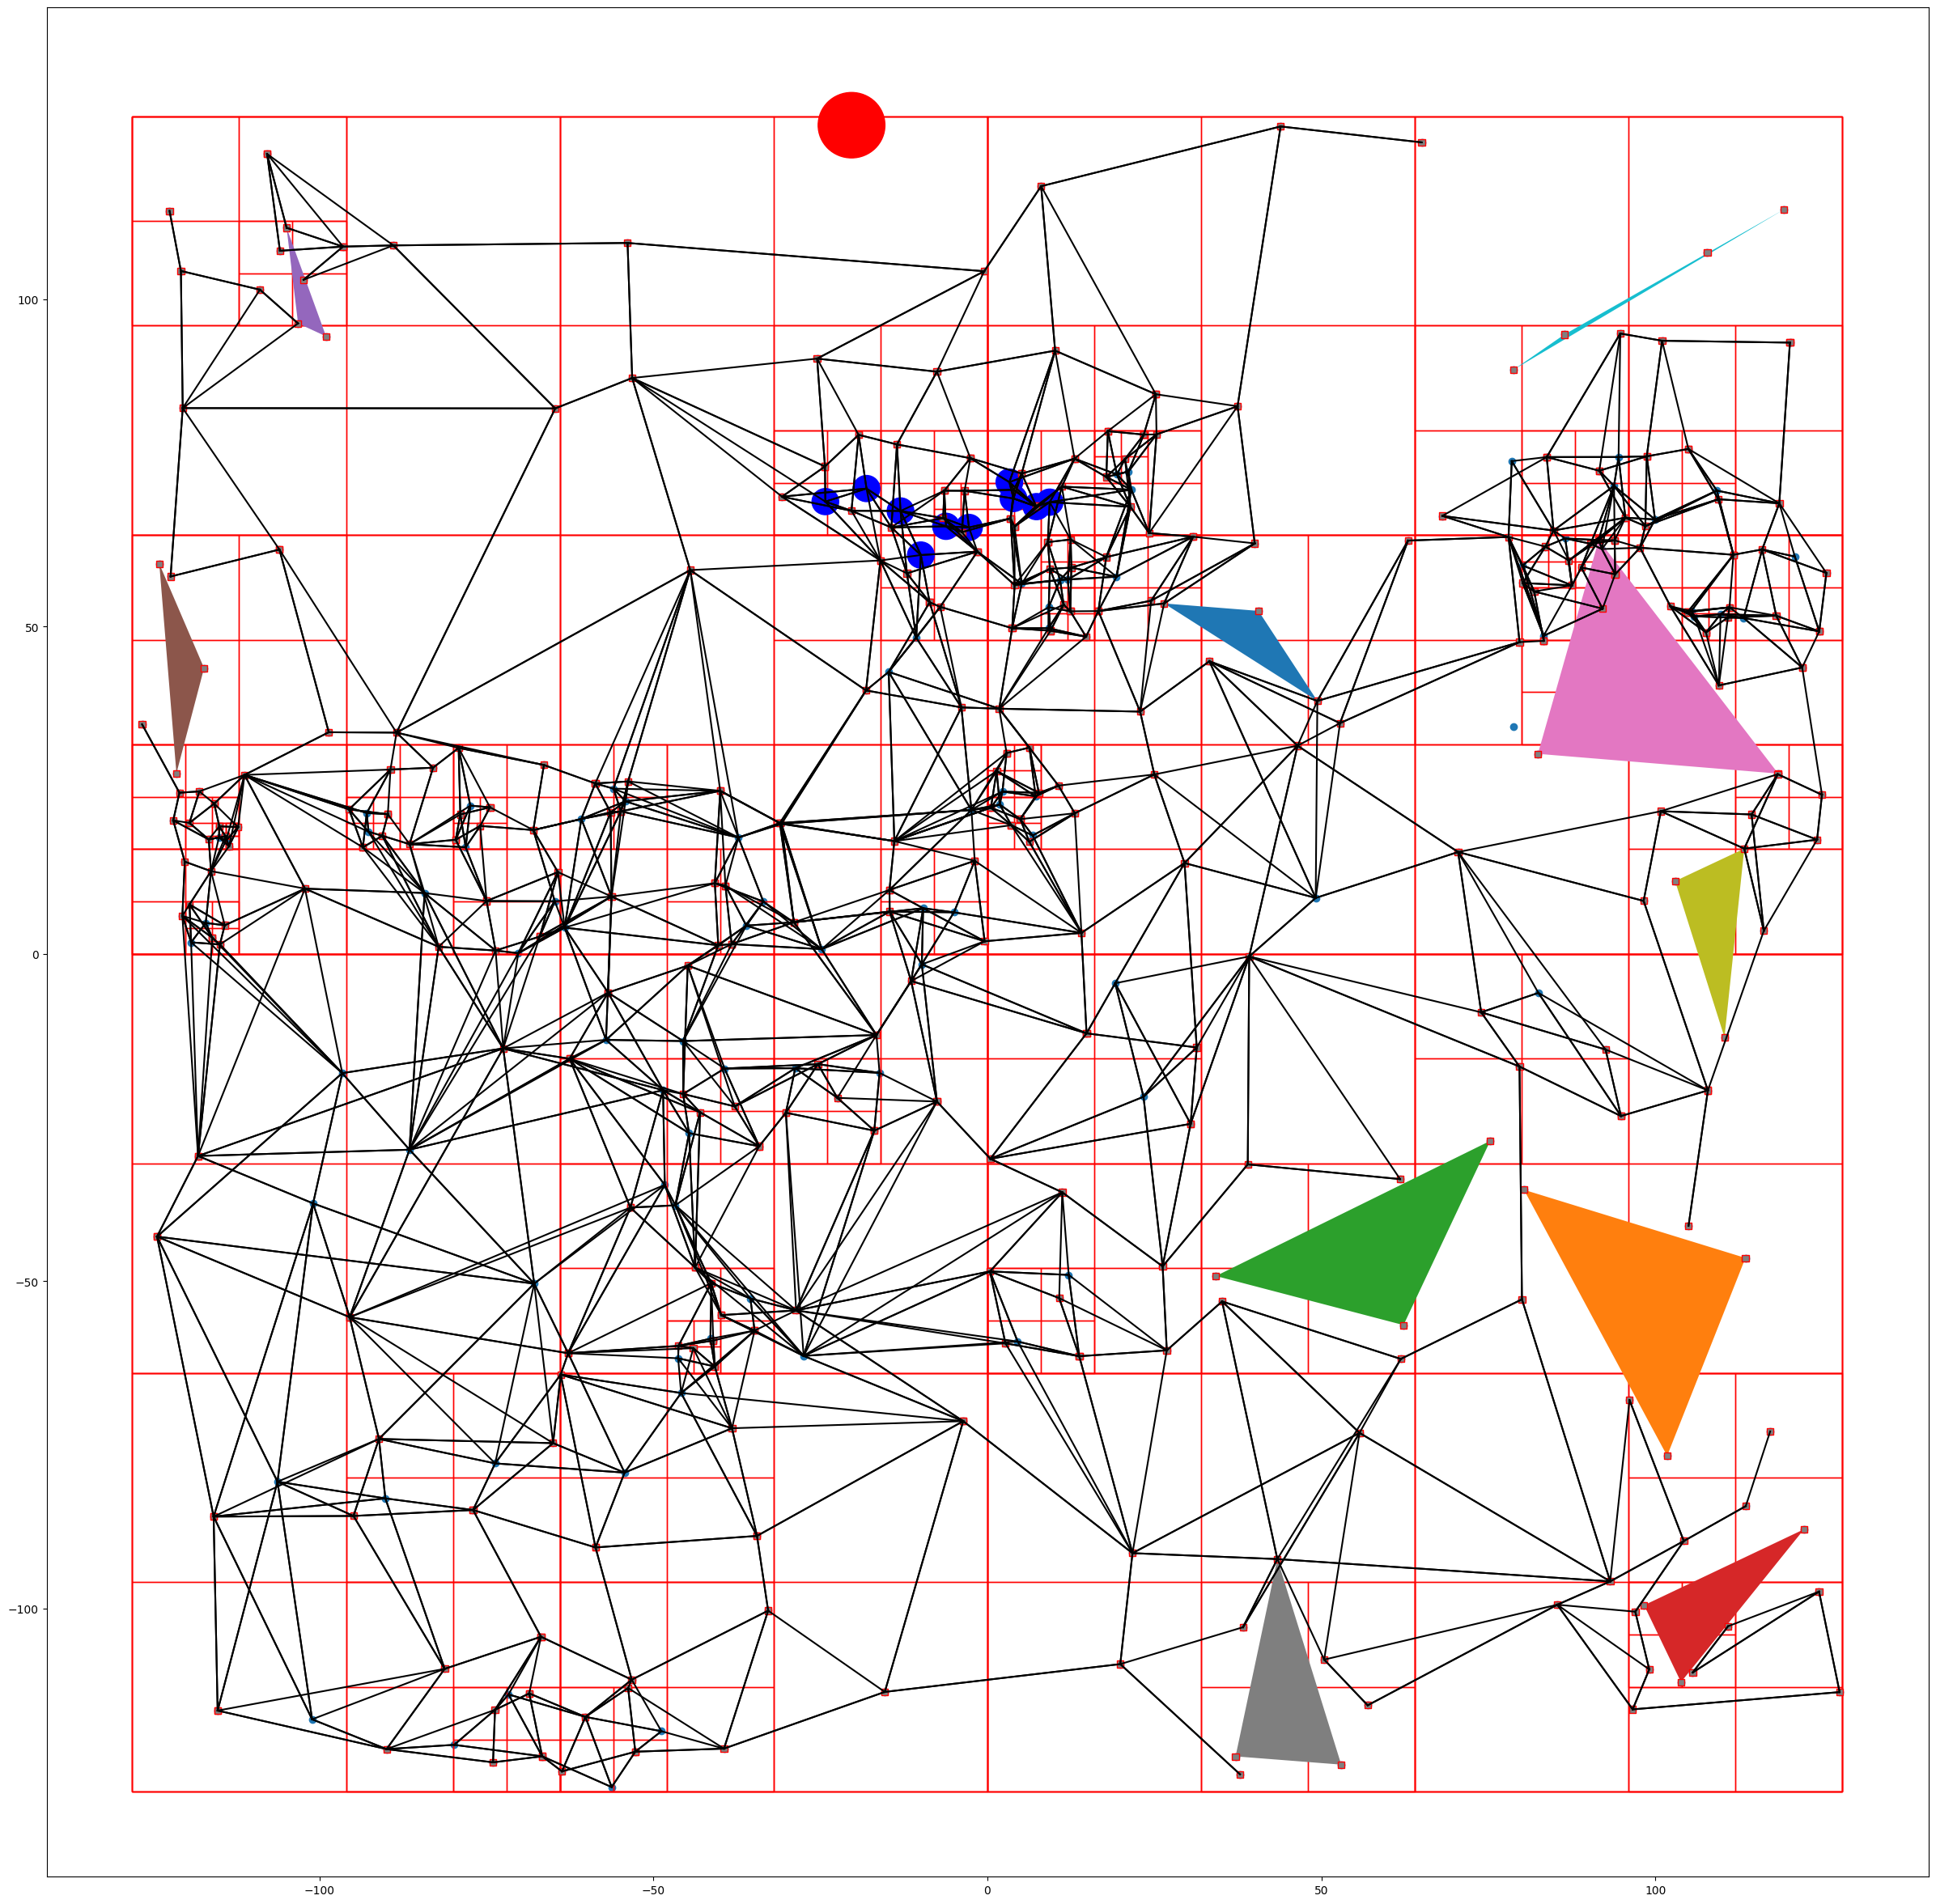

In [12]:
fig, ax = plt.subplots(figsize=(30, 30))

ax.scatter([p[0] for p in point_list], [p[1] for p in point_list])

for box in box_list:
    rect = Rectangle((box[0][0], box[1][0]), abs(box[0][0] - box[0][1]), abs(box[1][0] - box[1][1]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

for edge in edge_list:
    point = point_dict[edge[0]]
    point2 = point_dict[edge[1]]

    # draw segment
    plt.plot([point[0], point2[0]], [point[1], point2[1]], color='black')

# print(tope_list)

for tope in tope_list:
    
    myColor = generate_random_color()

    print(tope)
    
    x = []; y = []
    for ver in tope:
        # print(line)
        
        x.append(ver[0])
        y.append(ver[1])

    # print(x)
    # print(y)
    
    plt.fill(x, y)

circle = plt.Circle((query[0], query[1]), 5, color='r')
ax.add_patch(circle)

for sol in sols:
    circle = plt.Circle((sol[0], sol[1]), 2, color='blue')
    ax.add_patch(circle)

for p in point_list:
    if p[2] == 'x':
        rad = 0.5
        # circle = plt.Circle((p[0], p[1]), 0.5, color='r')
        rect = Rectangle((p[0] - rad, p[1] - rad), 2 * rad, 
                2 * rad, linewidth=1, edgecolor='r', facecolor='gray')
        ax.add_patch(rect)
        
    else:
        circle = plt.Circle((p[0], p[1]), 0.5, color='r')
        ax.add_patch(rect)

plt.show()

In [24]:
tope_list

[[[80.337, -36.0319], [101.768, -76.6829], [113.489, -46.4452]],
 [[34.2208, -49.2043], [62.3039, -56.7028], [75.2861, -28.5574]],
 [[122.259, -87.8966], [103.842, -111.244], [98.3207, -99.4987]],
 [[-103.179, 96.3355], [-104.895, 110.949], [-98.987, 94.3589]],
 [[-117.25, 43.6762], [-123.953, 59.6181], [-121.386, 27.5973]],
 [[82.4233, 30.5727], [118.403, 27.5566], [91.5283, 63.235]],
 [[52.9816, -123.853], [43.4168, -92.4506], [37.1658, -122.595]],
 [[113.317, 16.0919], [102.963, 11.1302], [110.35, -12.7344]],
 [[119.267, 113.745], [78.8119, 89.2856], [86.3726, 94.6301]],
 [[26.4679, 53.5506], [49.4061, 38.6559], [40.592, 52.415]]]